In [38]:
import cv2
import matplotlib.pyplot as plt

In [39]:
image=cv2.imread('people1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(800,600))
image.shape

(600, 800, 3)

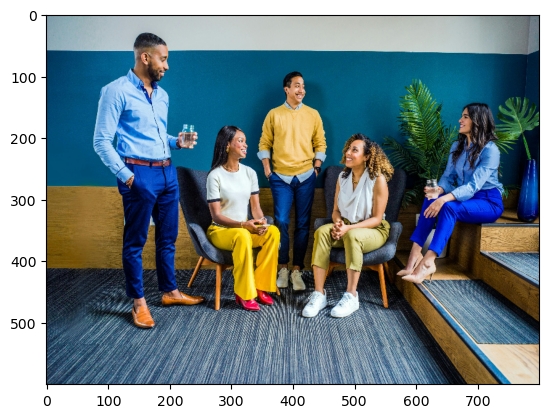

In [40]:
plt.imshow(image)

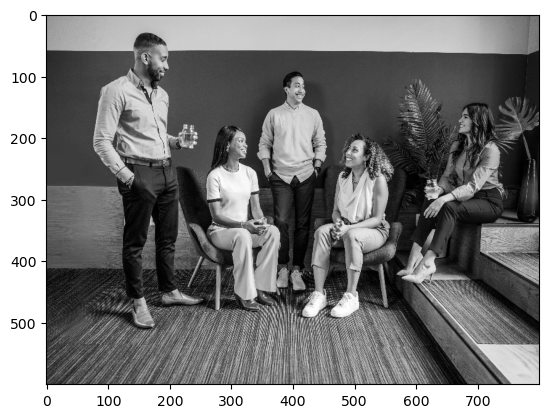

In [41]:
image_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray,cmap='gray')

In [42]:
image.shape,image_gray.shape

((600, 800, 3), (600, 800))

## Detecting Faces

In [19]:
face_detector=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



In [23]:
detections= face_detector.detectMultiScale(image_gray)

In [25]:
detections

array([[393, 103,  36,  36],
       [448, 300,  97,  97],
       [260, 311,  86,  86],
       [298, 193,  33,  33]])

In [31]:
image_gray.shape

(600, 800)

In [30]:
image.shape

(600, 800, 3)

393 103 36 36
448 300 97 97
260 311 86 86
298 193 33 33


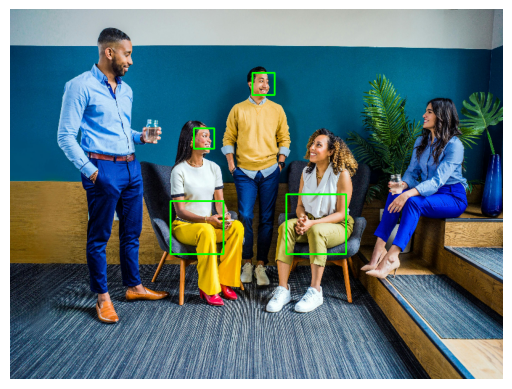

In [70]:
import cv2
import matplotlib.pyplot as plt

# Supongo que 'detections' contiene las detecciones en forma de (x, y, w, h)
for (x, y, w, h) in detections:
    print(x, y, w, h)
    # Dibujar el rectángulo alrededor de la detección
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convertir la imagen de BGR a RGB para mostrarla correctamente con Matplotlib


# Mostrar la imagen con los rectángulos dibujados
plt.imshow(image)
plt.axis('off')  # Para ocultar los ejes, opcional
plt.show()


## haarcascades parameters

In [68]:
image=cv2.imread('people1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image,(800,600))
image.shape



(600, 800, 3)

In [71]:
detections= face_detector.detectMultiScale(image_gray)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 28079420928 bytes in function 'cv::OutOfMemoryError'


## Understanding convolution

In [2]:
import numpy as np
import pandas as pd
import cv2
import torch
import torch.nn as nn

In [3]:
image=cv2.imread('image3.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

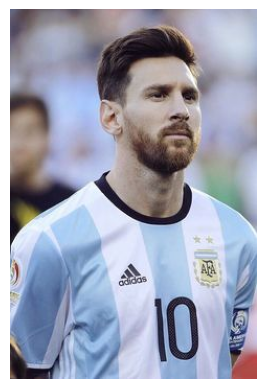

In [4]:
import matplotlib.pyplot as plt



# Mostrar la imagen
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [5]:
image.shape
image=cv2.resize(image,(244,244))
image.shape

(244, 244, 3)

<p>Experimentemos con alexnet desde 0</p>

In [30]:
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Primera capa convolucional de AlexNet: Conv(11x11, 96 filtros, stride=4, padding=0)
        self.layer1 = Conv(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)

    def forward(self, x):
        # Paso hacia adelante a través de la primera capa
        x = self.layer1(x)
        return x
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()



In [31]:
from PIL import Image

# Abre tu imagen usando PIL
image = Image.open('image3.jpg')

In [32]:
from torchvision import transforms

# Define la transformación para redimensionar la imagen a 227x227
resize_transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Cambiamos el tamaño a 227x227
    transforms.ToTensor()           # Convertimos la imagen a un tensor
])

# Aplica la transformación a la imagen
input_image = resize_transform(image)

# Añade una dimensión para el batch (porque AlexNet espera el tamaño (batch_size, 3, 227, 227))
input_image = input_image.unsqueeze(0)  # Esto convierte la imagen a (1, 3, 227, 227)

# Pasa la imagen a través del modelo AlexNet
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)



torch.Size([1, 96, 55, 55])


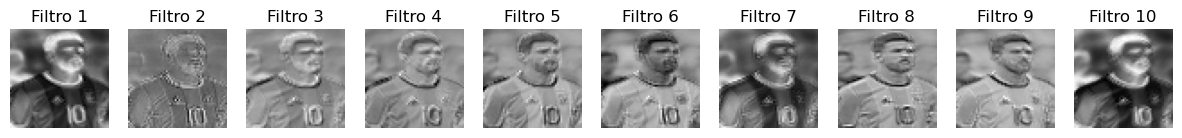

In [33]:
import matplotlib.pyplot as plt

# Eliminamos la dimensión del batch, pasando de (1, 96, 55, 55) a (96, 55, 55)
output = output.squeeze(0)

# Seleccionamos los primeros 5 canales
num_channels = 10
fig, axes = plt.subplots(1, num_channels, figsize=(15, 5))

for i in range(num_channels):
    # Extraemos el canal i (un filtro) y lo graficamos
    axes[i].imshow(output[i].detach().numpy(), cmap='gray')
    axes[i].set_title(f'Filtro {i+1}')
    axes[i].axis('off')

plt.show()


In [34]:
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Primera capa convolucional de AlexNet: Conv(11x11, 96 filtros, stride=4, padding=0)
        self.layer1 = Conv(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.maxpool1=MaxPooling()
    def forward(self, x):
        # Paso hacia adelante a través de la primera capa
        x = self.layer1(x)
        x=self.maxpool1(x)
        return x
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()

In [35]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 96, 27, 27])


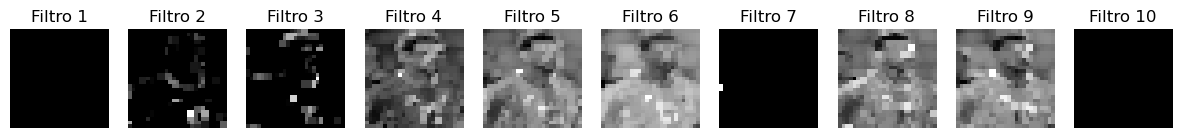

In [38]:
import matplotlib.pyplot as plt

# Eliminamos la dimensión del batch, pasando de (1, 96, 55, 55) a (96, 55, 55)
output = output.squeeze(0)

# Seleccionamos los primeros 5 canales
num_channels = 10
fig, axes = plt.subplots(1, num_channels, figsize=(15, 5))

for i in range(num_channels):
    # Extraemos el canal i (un filtro) y lo graficamos
    axes[i].imshow(output[i].detach().numpy(), cmap='gray')
    axes[i].set_title(f'Filtro {i+1}')
    axes[i].axis('off')

plt.show()

In [39]:
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Primera capa convolucional de AlexNet: Conv(11x11, 96 filtros, stride=4, padding=0)
        self.layer1 = Conv(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.maxpool1=MaxPooling()
        self.layer2=Conv(in_channels=96,out_channels=256,kernel_size=5,stride=2)
        self.maxpool2=MaxPooling()
    def forward(self, x):
        # Paso hacia adelante a través de la primera capa
        x = self.layer1(x)
        x=self.maxpool1(x)
        x=self.layer2(x)
        x=self.maxpool2(x)

        return x
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()

In [40]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 256, 6, 6])


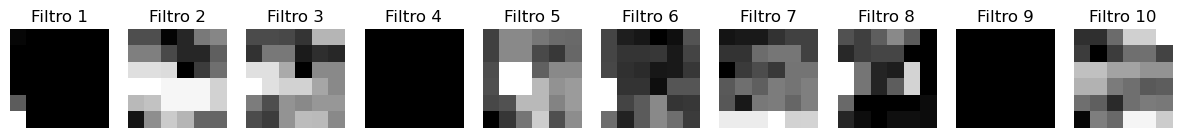

In [41]:
import matplotlib.pyplot as plt

# Eliminamos la dimensión del batch, pasando de (1, 96, 55, 55) a (96, 55, 55)
output = output.squeeze(0)

# Seleccionamos los primeros 5 canales
num_channels = 10
fig, axes = plt.subplots(1, num_channels, figsize=(15, 5))

for i in range(num_channels):
    # Extraemos el canal i (un filtro) y lo graficamos
    axes[i].imshow(output[i].detach().numpy(), cmap='gray')
    axes[i].set_title(f'Filtro {i+1}')
    axes[i].axis('off')

plt.show()

In [70]:
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Primera capa convolucional de AlexNet: Conv(11x11, 96 filtros, stride=4, padding=0)
        self.layer1 = Conv(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.maxpool1=MaxPooling()
        self.layer2=Conv(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2)
        self.maxpool2=MaxPooling()
        self.layer3=Conv(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.layer4=Conv(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.layer5=Conv(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.maxpool3=MaxPooling()
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096) 
        self.fc2 = nn.Linear(4096, 4096)
        
    def forward(self, x):
        # Paso hacia adelante a través de la primera capa
        x = self.layer1(x)
        x=self.maxpool1(x)
        x=self.layer2(x)
        x=self.maxpool2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        x=self.layer5(x)
        x=self.maxpool3(x)
        
      

        return x
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()

In [71]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 256, 6, 6])


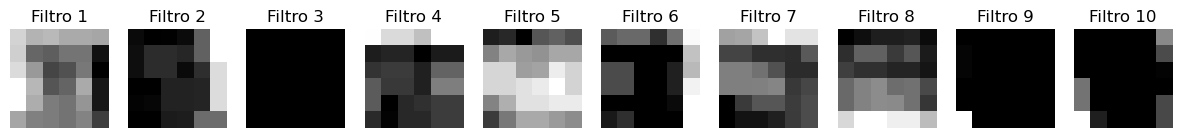

In [72]:
import matplotlib.pyplot as plt

# Eliminamos la dimensión del batch, pasando de (1, 96, 55, 55) a (96, 55, 55)
output = output.squeeze(0)

# Seleccionamos los primeros 5 canales
num_channels = 10
fig, axes = plt.subplots(1, num_channels, figsize=(15, 5))

for i in range(num_channels):
    # Extraemos el canal i (un filtro) y lo graficamos
    axes[i].imshow(output[i].detach().numpy(), cmap='gray')
    axes[i].set_title(f'Filtro {i+1}')
    axes[i].axis('off')

plt.show()

In [73]:
#Estudiando la capa fullyconected
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # Primera capa convolucional de AlexNet: Conv(11x11, 96 filtros, stride=4, padding=0)
        self.layer1 = Conv(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.maxpool1=MaxPooling()
        self.layer2=Conv(in_channels=96,out_channels=256,kernel_size=5,stride=1,padding=2)
        self.maxpool2=MaxPooling()
        self.layer3=Conv(in_channels=256,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.layer4=Conv(in_channels=384,out_channels=384,kernel_size=3,stride=1,padding=1)
        self.layer5=Conv(in_channels=384,out_channels=256,kernel_size=3,stride=1,padding=1)
        self.maxpool3=MaxPooling()
        
        self.fc1 = nn.Linear(256 * 6 * 6, 4096) 
        self.fc2 = nn.Linear(4096, 4096)
        
    def forward(self, x):
        # Paso hacia adelante a través de la primera capa
        x = self.layer1(x)
        x=self.maxpool1(x)
        x=self.layer2(x)
        x=self.maxpool2(x)
        x=self.layer3(x)
        x=self.layer4(x)
        x=self.layer5(x)
        x=self.maxpool3(x)
        
         # Aplanamos los datos
        x = x.view(x.size(0), -1)
        x=self.fc1(x)
        

        return x
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()

In [ ]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

In [76]:
# Acceder a los pesos de la capa fc1 (entre fc1 y fc2)
fc1_weights = model.fc1.weight.data

# Imprimir el tamaño de los pesos
print("Tamaño de los pesos entre fc1 y fc2:", fc1_weights.shape)

# Mostrar algunos de los pesos (por ejemplo, los primeros 5)
print("Primeros 5 pesos entre fc1 y fc2:")
print(fc1_weights[:5])


Tamaño de los pesos entre fc1 y fc2: torch.Size([4096, 9216])
Primeros 5 pesos entre fc1 y fc2:
tensor([[ 0.0066, -0.0015,  0.0001,  ..., -0.0066, -0.0003, -0.0001],
        [-0.0099,  0.0084, -0.0019,  ...,  0.0096, -0.0049, -0.0064],
        [-0.0039, -0.0029, -0.0084,  ..., -0.0062,  0.0023,  0.0053],
        [-0.0071,  0.0025,  0.0036,  ...,  0.0050, -0.0049,  0.0067],
        [ 0.0091,  0.0052, -0.0035,  ..., -0.0098,  0.0040,  0.0019]])


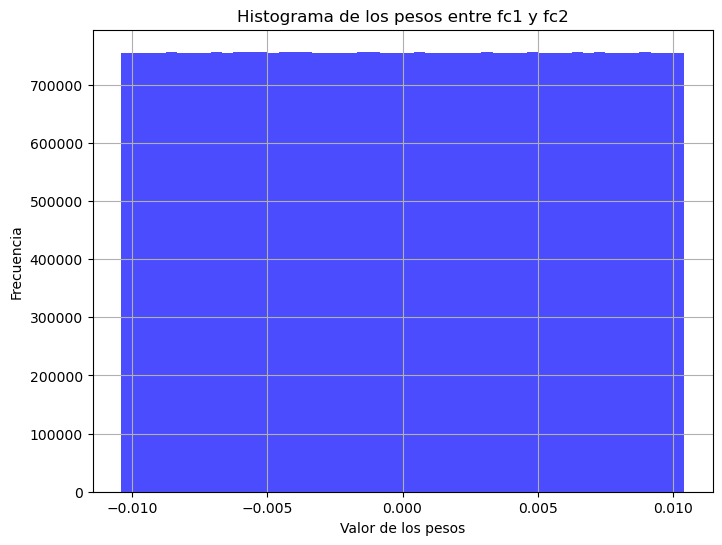

In [77]:
import torch
import matplotlib.pyplot as plt

# Acceder a los pesos entre fc1 y fc2
fc1_weights = model.fc1.weight.data.cpu().numpy()  # Convertir los pesos a numpy

# Crear el histograma de los pesos
plt.figure(figsize=(8,6))
plt.hist(fc1_weights.ravel(), bins=50, color='blue', alpha=0.7)

# Configurar las etiquetas y el título
plt.title("Histograma de los pesos entre fc1 y fc2")
plt.xlabel("Valor de los pesos")
plt.ylabel("Frecuencia")
plt.grid(True)

# Mostrar el histograma
plt.show()


In [130]:
import torch.optim as optim
from torchvision import transforms,datasets
from torch.utils.data import DataLoader, TensorDataset

In [138]:
import torch
import torch.nn as nn

# Definición de la clase Conv para una capa convolucional personalizada
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(Conv, self).__init__()
        # Definimos la convolución
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        # Usamos ReLU como función de activación
        self.relu = nn.ReLU(inplace=True)
    
    def forward(self, x):
        # Aplicamos la convolución y luego la activación ReLU
        x = self.conv(x)
        x = self.relu(x)
        return x
# Definición de la clase Conv para una capa convolucional personalizada con LRN
class ConvLRN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(ConvLRN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.relu = nn.ReLU(inplace=True)
        self.lrn = nn.LocalResponseNorm(size=5, alpha=1e-4, beta=0.75, k=2.0)  # LRN

    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        x = self.lrn(x)  # Aplicar LRN después de la activación
        return x
    
class ConvBN(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=0):
        super(ConvBN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)  # Batch Normalization
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x
        
class MaxPooling(nn.Module):
    def __init__(self,kernel_size=3,stride=2,padding=0):
        super(MaxPooling,self).__init__()
        self.maxpool=nn.MaxPool2d(kernel_size=kernel_size,stride=stride,padding=padding)
        
    def forward(self,x):
        x=self.maxpool(x)
        return x

# Clase AlexNet que incluye la primera capa convolucional
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.layer1 = ConvBN(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)
        self.maxpool1 = MaxPooling()
        self.layer2 = ConvBN(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.maxpool2 = MaxPooling()
        self.layer3 = Conv(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.layer4 = Conv(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.layer5 = Conv(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.maxpool3 = MaxPooling()
        
        # Ajustar el tamaño de entrada aquí
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc3= nn.Sequential(
            nn.Linear(4096, 2))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.maxpool1(x)
        x = self.layer2(x)
        x = self.maxpool2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.maxpool3(x)
        
        # Imprimir el tamaño de la salida antes de aplanar
        print(x.size())
        
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        
        
        return x



# Función de entrenamiento
def train(model, dataloader, criterion, optimizer, num_epochs=1):
    model.train()
    # Configurar el dispositivo
    device = torch.device("cpu")
    model.to(device)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")
  
    
torch.manual_seed(42)
np.random.seed(42)
# Inicializamos el modelo AlexNet
model = AlexNet()

In [139]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 256, 6, 6])
torch.Size([1, 2])


In [140]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 256, 6, 6])
torch.Size([1, 2])


In [141]:
from torch.utils.data import DataLoader, random_split

In [156]:
# Rutas y transformaciones
data_dir = r'C:\Users\ASUS RYZEN 7\Documents\PROYECTOS\Computer vision\animas\animal'
batch_size = 32

# Transformaciones para entrenamiento y validación
transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Redimensiona las imágenes
    transforms.ToTensor(),  # Convierte las imágenes a tensores
      # Normalización
])

# Cargar el dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Dividir en conjuntos de entrenamiento y validación
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


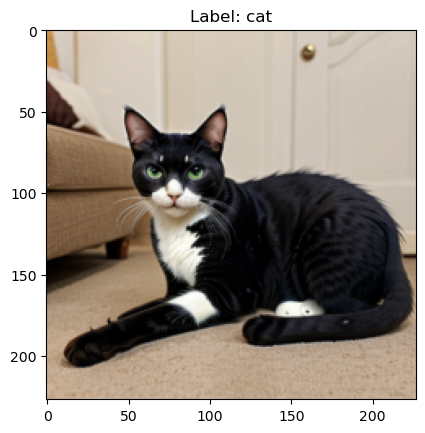

In [157]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, title=None):
    # No desnormalizamos la imagen ya que no hemos normalizado
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Transpone la imagen (C,H,W) a (H,W,C)
    if title is not None:
        plt.title(title)
    plt.show()

# Obtener un batch de datos
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Mostrar la primera imagen del batch
imshow(images[0], title=f'Label: {dataset.classes[labels[0]]}')



In [158]:
# Configurar el dispositivo
device = torch.device("cpu")
model.to(device)

AlexNet(
  (layer1): ConvBN(
    (conv): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), bias=False)
    (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (maxpool1): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): ConvBN(
    (conv): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (maxpool2): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Conv(
    (conv): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (layer4): Conv(
    (conv): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (l

In [173]:
num_classes = 2
num_epochs = 10
batch_size = 16
learning_rate = 0.005

model = AlexNet().to(device)

In [174]:
# Ejemplo de ver el modelo
print(model)

AlexNet(
  (layer1): ConvBN(
    (conv): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), bias=False)
    (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (maxpool1): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): ConvBN(
    (conv): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), bias=False)
    (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
  )
  (maxpool2): MaxPooling(
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Conv(
    (conv): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (layer4): Conv(
    (conv): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (relu): ReLU(inplace=True)
  )
  (l

In [175]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(train_loader)

In [177]:

from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns

def train(model, dataloader, criterion, optimizer, num_epochs=1):
    model.train()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    total_step = len(dataloader)
    
    train_losses = []
    train_accuracies = []
    all_labels = []
    all_preds = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        corrects = 0
        total = 0
        
        for i, (images, labels) in enumerate(tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")):  
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Track loss
            running_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (predicted == labels).sum().item()
            
            # Store predictions and labels
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
        
        epoch_loss = running_loss / total_step
        epoch_accuracy = corrects / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')
    
    return train_losses, train_accuracies, all_labels, all_preds



In [180]:
train_losses, train_accuracies, all_labels, all_preds = train(model, train_loader, criterion, optimizer, num_epochs)


Epoch 1/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 1/10:   4%|▍         | 1/25 [00:03<01:33,  3.90s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:   8%|▊         | 2/25 [00:07<01:30,  3.95s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  12%|█▏        | 3/25 [00:11<01:24,  3.85s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  16%|█▌        | 4/25 [00:16<01:27,  4.14s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  20%|██        | 5/25 [00:21<01:30,  4.51s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  24%|██▍       | 6/25 [00:25<01:20,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  28%|██▊       | 7/25 [00:28<01:11,  3.99s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  32%|███▏      | 8/25 [00:32<01:05,  3.84s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  36%|███▌      | 9/25 [00:35<00:58,  3.67s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  40%|████      | 10/25 [00:39<00:54,  3.66s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  44%|████▍     | 11/25 [00:42<00:50,  3.61s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  48%|████▊     | 12/25 [00:46<00:48,  3.72s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  52%|█████▏    | 13/25 [00:50<00:45,  3.78s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  56%|█████▌    | 14/25 [00:54<00:43,  3.92s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  60%|██████    | 15/25 [00:58<00:39,  4.00s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  64%|██████▍   | 16/25 [01:03<00:37,  4.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  68%|██████▊   | 17/25 [01:07<00:34,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  72%|███████▏  | 18/25 [01:12<00:30,  4.41s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  76%|███████▌  | 19/25 [01:16<00:26,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  80%|████████  | 20/25 [01:20<00:21,  4.30s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  84%|████████▍ | 21/25 [01:25<00:17,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  88%|████████▊ | 22/25 [01:29<00:13,  4.37s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  92%|█████████▏| 23/25 [01:33<00:08,  4.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10:  96%|█████████▌| 24/25 [01:37<00:04,  4.19s/it]

torch.Size([32, 256, 6, 6])


Epoch 1/10: 100%|██████████| 25/25 [01:42<00:00,  4.09s/it]


Epoch [1/10], Loss: 0.6900, Accuracy: 0.5212


Epoch 2/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 2/10:   4%|▍         | 1/25 [00:04<01:36,  4.03s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:   8%|▊         | 2/25 [00:07<01:30,  3.95s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  12%|█▏        | 3/25 [00:11<01:27,  4.00s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  16%|█▌        | 4/25 [00:16<01:27,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  20%|██        | 5/25 [00:20<01:25,  4.28s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  24%|██▍       | 6/25 [00:24<01:19,  4.17s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  28%|██▊       | 7/25 [00:29<01:16,  4.23s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  32%|███▏      | 8/25 [00:33<01:12,  4.25s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  36%|███▌      | 9/25 [00:37<01:06,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  40%|████      | 10/25 [00:41<01:02,  4.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  44%|████▍     | 11/25 [00:46<00:59,  4.24s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  48%|████▊     | 12/25 [00:51<01:01,  4.74s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  52%|█████▏    | 13/25 [00:57<01:00,  5.07s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  56%|█████▌    | 14/25 [01:02<00:54,  5.00s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  60%|██████    | 15/25 [01:06<00:47,  4.75s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  64%|██████▍   | 16/25 [01:11<00:41,  4.63s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  68%|██████▊   | 17/25 [01:15<00:36,  4.53s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  72%|███████▏  | 18/25 [01:19<00:31,  4.47s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  76%|███████▌  | 19/25 [01:24<00:26,  4.44s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  80%|████████  | 20/25 [01:28<00:21,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  84%|████████▍ | 21/25 [01:32<00:17,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  88%|████████▊ | 22/25 [01:36<00:13,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  92%|█████████▏| 23/25 [01:41<00:08,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10:  96%|█████████▌| 24/25 [01:45<00:04,  4.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 2/10: 100%|██████████| 25/25 [01:49<00:00,  4.39s/it]


Epoch [2/10], Loss: 0.6815, Accuracy: 0.6138


Epoch 3/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 3/10:   4%|▍         | 1/25 [00:04<01:42,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:   8%|▊         | 2/25 [00:08<01:37,  4.22s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  12%|█▏        | 3/25 [00:12<01:31,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  16%|█▌        | 4/25 [00:16<01:26,  4.12s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  20%|██        | 5/25 [00:20<01:23,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  24%|██▍       | 6/25 [00:25<01:20,  4.23s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  28%|██▊       | 7/25 [00:29<01:15,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  32%|███▏      | 8/25 [00:33<01:10,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  36%|███▌      | 9/25 [00:37<01:06,  4.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  40%|████      | 10/25 [00:41<01:01,  4.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  44%|████▍     | 11/25 [00:45<00:57,  4.14s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  48%|████▊     | 12/25 [00:50<00:54,  4.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  52%|█████▏    | 13/25 [00:54<00:50,  4.17s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  56%|█████▌    | 14/25 [00:58<00:44,  4.07s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  60%|██████    | 15/25 [01:02<00:41,  4.19s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  64%|██████▍   | 16/25 [01:07<00:39,  4.41s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  68%|██████▊   | 17/25 [01:11<00:35,  4.38s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  72%|███████▏  | 18/25 [01:16<00:30,  4.38s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  76%|███████▌  | 19/25 [01:20<00:26,  4.39s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  80%|████████  | 20/25 [01:25<00:23,  4.67s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  84%|████████▍ | 21/25 [01:31<00:19,  4.86s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  88%|████████▊ | 22/25 [01:35<00:14,  4.71s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  92%|█████████▏| 23/25 [01:39<00:09,  4.56s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10:  96%|█████████▌| 24/25 [01:43<00:04,  4.44s/it]

torch.Size([32, 256, 6, 6])


Epoch 3/10: 100%|██████████| 25/25 [01:48<00:00,  4.32s/it]


Epoch [3/10], Loss: 0.6422, Accuracy: 0.6475


Epoch 4/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 4/10:   4%|▍         | 1/25 [00:04<01:43,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:   8%|▊         | 2/25 [00:08<01:35,  4.14s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  12%|█▏        | 3/25 [00:12<01:31,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  16%|█▌        | 4/25 [00:16<01:27,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  20%|██        | 5/25 [00:20<01:23,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  24%|██▍       | 6/25 [00:25<01:20,  4.23s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  28%|██▊       | 7/25 [00:29<01:15,  4.19s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  32%|███▏      | 8/25 [00:34<01:13,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  36%|███▌      | 9/25 [00:38<01:09,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  40%|████      | 10/25 [00:42<01:04,  4.30s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  44%|████▍     | 11/25 [00:46<01:00,  4.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  48%|████▊     | 12/25 [00:50<00:55,  4.24s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  52%|█████▏    | 13/25 [00:55<00:53,  4.45s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  56%|█████▌    | 14/25 [01:00<00:50,  4.60s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  60%|██████    | 15/25 [01:05<00:46,  4.61s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  64%|██████▍   | 16/25 [01:10<00:42,  4.67s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  68%|██████▊   | 17/25 [01:15<00:38,  4.87s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  72%|███████▏  | 18/25 [01:19<00:33,  4.72s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  76%|███████▌  | 19/25 [01:24<00:27,  4.57s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  80%|████████  | 20/25 [01:28<00:22,  4.46s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  84%|████████▍ | 21/25 [01:32<00:17,  4.37s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  88%|████████▊ | 22/25 [01:36<00:12,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  92%|█████████▏| 23/25 [01:41<00:08,  4.31s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10:  96%|█████████▌| 24/25 [01:45<00:04,  4.28s/it]

torch.Size([32, 256, 6, 6])


Epoch 4/10: 100%|██████████| 25/25 [01:49<00:00,  4.38s/it]


Epoch [4/10], Loss: 0.4803, Accuracy: 0.7825


Epoch 5/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 5/10:   4%|▍         | 1/25 [00:04<01:38,  4.12s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:   8%|▊         | 2/25 [00:08<01:34,  4.10s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  12%|█▏        | 3/25 [00:12<01:30,  4.11s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  16%|█▌        | 4/25 [00:16<01:26,  4.14s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  20%|██        | 5/25 [00:20<01:22,  4.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  24%|██▍       | 6/25 [00:24<01:18,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  28%|██▊       | 7/25 [00:28<01:14,  4.14s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  32%|███▏      | 8/25 [00:32<01:09,  4.10s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  36%|███▌      | 9/25 [00:37<01:06,  4.17s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  40%|████      | 10/25 [00:41<01:02,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  44%|████▍     | 11/25 [00:45<00:58,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  48%|████▊     | 12/25 [00:49<00:54,  4.20s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  52%|█████▏    | 13/25 [00:54<00:51,  4.27s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  56%|█████▌    | 14/25 [00:58<00:46,  4.24s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  60%|██████    | 15/25 [01:02<00:42,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  64%|██████▍   | 16/25 [01:06<00:38,  4.24s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  68%|██████▊   | 17/25 [01:11<00:33,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  72%|███████▏  | 18/25 [01:15<00:29,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  76%|███████▌  | 19/25 [01:19<00:25,  4.20s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  80%|████████  | 20/25 [01:23<00:21,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  84%|████████▍ | 21/25 [01:27<00:16,  4.20s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  88%|████████▊ | 22/25 [01:31<00:12,  4.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  92%|█████████▏| 23/25 [01:36<00:08,  4.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10:  96%|█████████▌| 24/25 [01:40<00:04,  4.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 5/10: 100%|██████████| 25/25 [01:44<00:00,  4.17s/it]


Epoch [5/10], Loss: 0.3744, Accuracy: 0.8450


Epoch 6/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 6/10:   4%|▍         | 1/25 [00:04<01:43,  4.31s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:   8%|▊         | 2/25 [00:08<01:36,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  12%|█▏        | 3/25 [00:12<01:31,  4.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  16%|█▌        | 4/25 [00:16<01:25,  4.07s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  20%|██        | 5/25 [00:20<01:21,  4.09s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  24%|██▍       | 6/25 [00:24<01:18,  4.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  28%|██▊       | 7/25 [00:29<01:17,  4.31s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  32%|███▏      | 8/25 [00:33<01:12,  4.28s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  36%|███▌      | 9/25 [00:37<01:08,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  40%|████      | 10/25 [00:42<01:04,  4.27s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  44%|████▍     | 11/25 [00:46<01:00,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  48%|████▊     | 12/25 [00:51<00:57,  4.43s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  52%|█████▏    | 13/25 [00:57<00:59,  4.92s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  56%|█████▌    | 14/25 [01:01<00:52,  4.74s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  60%|██████    | 15/25 [01:06<00:46,  4.66s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  64%|██████▍   | 16/25 [01:10<00:41,  4.65s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  68%|██████▊   | 17/25 [01:15<00:36,  4.56s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  72%|███████▏  | 18/25 [01:19<00:31,  4.53s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  76%|███████▌  | 19/25 [01:24<00:27,  4.55s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  80%|████████  | 20/25 [01:28<00:22,  4.43s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  84%|████████▍ | 21/25 [01:32<00:17,  4.34s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  88%|████████▊ | 22/25 [01:36<00:12,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  92%|█████████▏| 23/25 [01:40<00:08,  4.21s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10:  96%|█████████▌| 24/25 [01:44<00:04,  4.18s/it]

torch.Size([32, 256, 6, 6])


Epoch 6/10: 100%|██████████| 25/25 [01:48<00:00,  4.36s/it]


Epoch [6/10], Loss: 0.2392, Accuracy: 0.9025


Epoch 7/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 7/10:   4%|▍         | 1/25 [00:04<01:46,  4.44s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:   8%|▊         | 2/25 [00:09<01:47,  4.68s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  12%|█▏        | 3/25 [00:13<01:40,  4.55s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  16%|█▌        | 4/25 [00:18<01:34,  4.51s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  20%|██        | 5/25 [00:22<01:28,  4.41s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  24%|██▍       | 6/25 [00:26<01:24,  4.47s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  28%|██▊       | 7/25 [00:31<01:21,  4.51s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  32%|███▏      | 8/25 [00:35<01:14,  4.39s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  36%|███▌      | 9/25 [00:39<01:09,  4.33s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  40%|████      | 10/25 [00:44<01:04,  4.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  44%|████▍     | 11/25 [00:48<01:00,  4.30s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  48%|████▊     | 12/25 [00:52<00:56,  4.35s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  52%|█████▏    | 13/25 [00:56<00:51,  4.28s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  56%|█████▌    | 14/25 [01:01<00:46,  4.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  60%|██████    | 15/25 [01:05<00:42,  4.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  64%|██████▍   | 16/25 [01:10<00:40,  4.51s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  68%|██████▊   | 17/25 [01:15<00:37,  4.69s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  72%|███████▏  | 18/25 [01:20<00:33,  4.83s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  76%|███████▌  | 19/25 [01:25<00:29,  4.89s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  80%|████████  | 20/25 [01:30<00:24,  4.90s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  84%|████████▍ | 21/25 [01:35<00:19,  4.87s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  88%|████████▊ | 22/25 [01:40<00:14,  4.84s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  92%|█████████▏| 23/25 [01:45<00:09,  4.88s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10:  96%|█████████▌| 24/25 [01:49<00:04,  4.81s/it]

torch.Size([32, 256, 6, 6])


Epoch 7/10: 100%|██████████| 25/25 [01:54<00:00,  4.58s/it]


Epoch [7/10], Loss: 0.1803, Accuracy: 0.9237


Epoch 8/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 8/10:   4%|▍         | 1/25 [00:04<01:50,  4.59s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:   8%|▊         | 2/25 [00:09<01:46,  4.63s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  12%|█▏        | 3/25 [00:13<01:40,  4.57s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  16%|█▌        | 4/25 [00:18<01:36,  4.60s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  20%|██        | 5/25 [00:23<01:34,  4.72s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  24%|██▍       | 6/25 [00:27<01:28,  4.65s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  28%|██▊       | 7/25 [00:32<01:23,  4.66s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  32%|███▏      | 8/25 [00:37<01:18,  4.64s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  36%|███▌      | 9/25 [00:41<01:14,  4.65s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  40%|████      | 10/25 [00:46<01:09,  4.63s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  44%|████▍     | 11/25 [00:51<01:08,  4.88s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  48%|████▊     | 12/25 [00:56<01:03,  4.92s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  52%|█████▏    | 13/25 [01:01<00:59,  4.94s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  56%|█████▌    | 14/25 [01:07<00:55,  5.06s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  60%|██████    | 15/25 [01:12<00:50,  5.02s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  64%|██████▍   | 16/25 [01:19<00:51,  5.69s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  68%|██████▊   | 17/25 [01:24<00:44,  5.53s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  72%|███████▏  | 18/25 [01:34<00:47,  6.81s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  76%|███████▌  | 19/25 [01:41<00:42,  7.04s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  80%|████████  | 20/25 [01:48<00:34,  6.91s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  84%|████████▍ | 21/25 [01:54<00:26,  6.62s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  88%|████████▊ | 22/25 [02:00<00:19,  6.36s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  92%|█████████▏| 23/25 [02:05<00:11,  5.92s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10:  96%|█████████▌| 24/25 [02:09<00:05,  5.55s/it]

torch.Size([32, 256, 6, 6])


Epoch 8/10: 100%|██████████| 25/25 [02:14<00:00,  5.37s/it]


Epoch [8/10], Loss: 0.1149, Accuracy: 0.9650


Epoch 9/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 9/10:   4%|▍         | 1/25 [00:04<01:50,  4.62s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:   8%|▊         | 2/25 [00:09<01:47,  4.65s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  12%|█▏        | 3/25 [00:14<01:46,  4.85s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  16%|█▌        | 4/25 [00:19<01:45,  5.02s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  20%|██        | 5/25 [00:24<01:38,  4.94s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  24%|██▍       | 6/25 [00:30<01:39,  5.24s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  28%|██▊       | 7/25 [00:35<01:37,  5.39s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  32%|███▏      | 8/25 [00:40<01:27,  5.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  36%|███▌      | 9/25 [00:45<01:19,  4.95s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  40%|████      | 10/25 [00:49<01:12,  4.85s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  44%|████▍     | 11/25 [00:54<01:06,  4.75s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  48%|████▊     | 12/25 [00:59<01:04,  4.98s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  52%|█████▏    | 13/25 [01:04<00:58,  4.89s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  56%|█████▌    | 14/25 [01:08<00:52,  4.73s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  60%|██████    | 15/25 [01:12<00:45,  4.53s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  64%|██████▍   | 16/25 [01:17<00:40,  4.48s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  68%|██████▊   | 17/25 [01:21<00:35,  4.45s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  72%|███████▏  | 18/25 [01:25<00:30,  4.36s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  76%|███████▌  | 19/25 [01:30<00:26,  4.41s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  80%|████████  | 20/25 [01:34<00:22,  4.47s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  84%|████████▍ | 21/25 [01:39<00:17,  4.50s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  88%|████████▊ | 22/25 [01:44<00:14,  4.71s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  92%|█████████▏| 23/25 [01:49<00:09,  4.68s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10:  96%|█████████▌| 24/25 [01:53<00:04,  4.65s/it]

torch.Size([32, 256, 6, 6])


Epoch 9/10: 100%|██████████| 25/25 [01:58<00:00,  4.73s/it]


Epoch [9/10], Loss: 0.1075, Accuracy: 0.9587


Epoch 10/10:   0%|          | 0/25 [00:00<?, ?it/s]

torch.Size([32, 256, 6, 6])


Epoch 10/10:   4%|▍         | 1/25 [00:04<01:52,  4.70s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:   8%|▊         | 2/25 [00:09<01:53,  4.92s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  12%|█▏        | 3/25 [00:15<01:52,  5.09s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  16%|█▌        | 4/25 [00:19<01:45,  5.01s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  20%|██        | 5/25 [00:25<01:42,  5.13s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  24%|██▍       | 6/25 [00:30<01:40,  5.27s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  28%|██▊       | 7/25 [00:36<01:36,  5.36s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  32%|███▏      | 8/25 [00:41<01:29,  5.29s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  36%|███▌      | 9/25 [00:46<01:21,  5.07s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  40%|████      | 10/25 [00:51<01:16,  5.12s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  44%|████▍     | 11/25 [00:56<01:09,  4.99s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  48%|████▊     | 12/25 [01:00<01:04,  4.95s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  52%|█████▏    | 13/25 [01:05<00:59,  4.97s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  56%|█████▌    | 14/25 [01:10<00:53,  4.84s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  60%|██████    | 15/25 [01:14<00:47,  4.74s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  64%|██████▍   | 16/25 [01:19<00:43,  4.78s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  68%|██████▊   | 17/25 [01:25<00:41,  5.15s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  72%|███████▏  | 18/25 [01:31<00:36,  5.16s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  76%|███████▌  | 19/25 [01:36<00:31,  5.26s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  80%|████████  | 20/25 [01:42<00:26,  5.40s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  84%|████████▍ | 21/25 [01:47<00:21,  5.32s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  88%|████████▊ | 22/25 [01:51<00:15,  5.09s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  92%|█████████▏| 23/25 [01:56<00:09,  4.90s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10:  96%|█████████▌| 24/25 [02:00<00:04,  4.77s/it]

torch.Size([32, 256, 6, 6])


Epoch 10/10: 100%|██████████| 25/25 [02:06<00:00,  5.04s/it]

Epoch [10/10], Loss: 0.0936, Accuracy: 0.9688


In [181]:
def plot_metrics(train_losses, train_accuracies):
    # Graficar pérdida
    plt.figure()
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    
    # Graficar precisión
    plt.figure()
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()


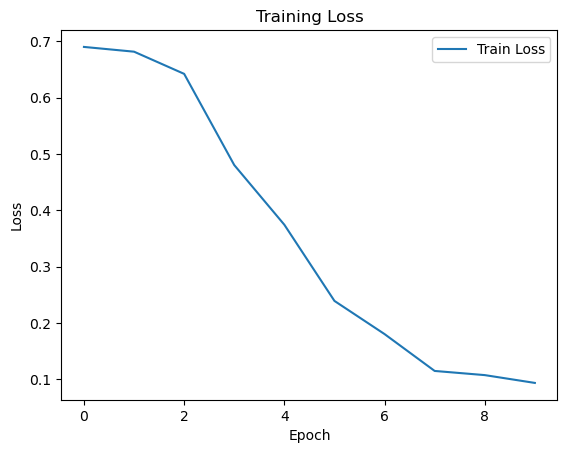

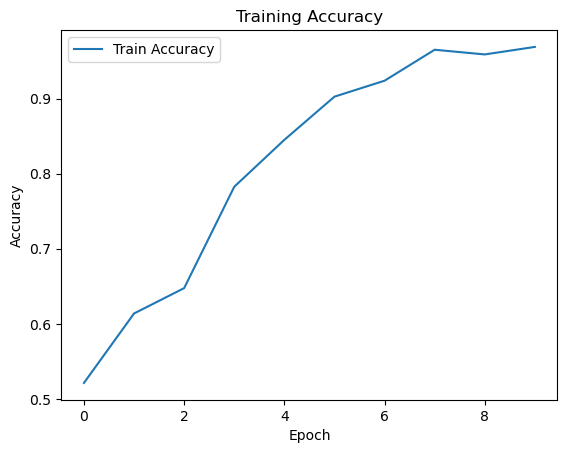

In [182]:
    
# Graficar métricas
plot_metrics(train_losses, train_accuracies)

In [183]:
def plot_roc_curve(labels, preds):
    fpr, tpr, _ = roc_curve(labels, preds, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()


In [184]:
def print_classification_report(labels, preds):
    print("Classification Report:")
    print(classification_report(labels, preds, target_names=['Class 0', 'Class 1']))
    
    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


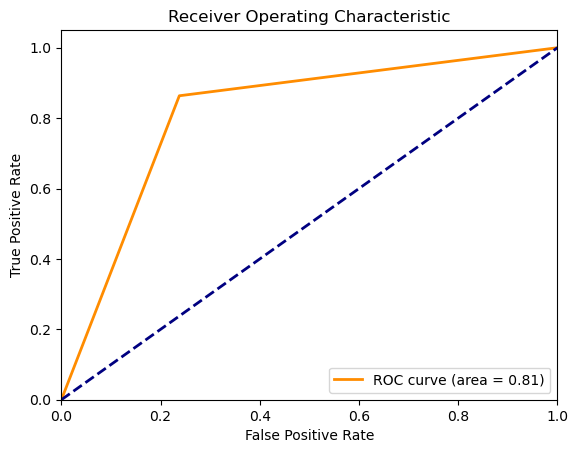

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.76      0.80      4000
     Class 1       0.78      0.86      0.82      4000

    accuracy                           0.81      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.82      0.81      0.81      8000



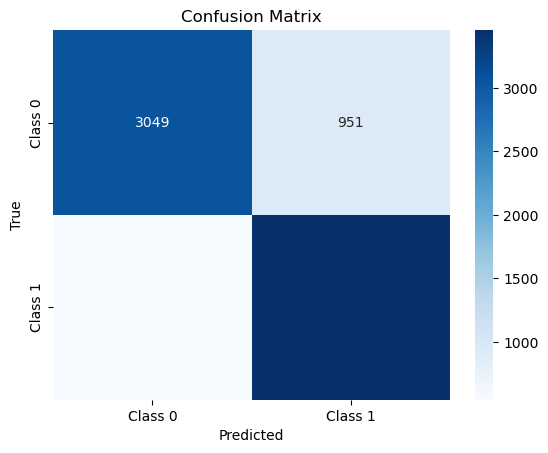

In [185]:
  # Graficar curva ROC
plot_roc_curve(all_labels, all_preds)
    
    # Imprimir reporte de clasificación
print_classification_report(all_labels, all_preds)

In [83]:
output = model(input_image)

# Imprime la forma de la salida
print(output.shape)

torch.Size([1, 2])


In [26]:
output

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0300, 0.0000,  ..., 0.0826, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

Nuevo shape de la imagen: torch.Size([1, 3, 354, 236])
Pesos de la capa convolucional (kernel):
tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]]])


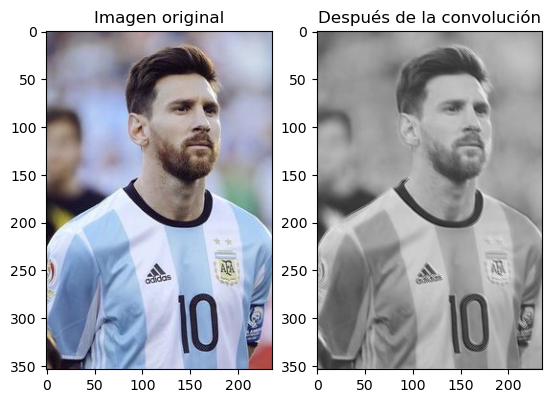

In [33]:

# Convertir a tensor de PyTorch y reorganizar las dimensiones
# El formato esperado es (batch_size, channels, height, width)
image_tensor = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
torch.manual_seed(42)
np.random.seed(42)
# Verificar el nuevo shape
print(f"Nuevo shape de la imagen: {image_tensor.shape}")  # (1, 3, 354, 236)

# Definir la capa de convolución para imágenes RGB
conv_layer = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1, padding=1)

# Aplicar la convolución
conv_output = conv_layer(image_tensor)

# Convertir el resultado a numpy para visualizar
conv_output_np = conv_output.detach().numpy()
# Ver los pesos (filtros) de la capa convolucional
print("Pesos de la capa convolucional (kernel):")
print(conv_layer.weight.data) 

# Visualizar la imagen original y el resultado después de la convolución
plt.subplot(1, 2, 1)
plt.title("Imagen original")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Después de la convolución")
plt.imshow(conv_output_np[0, 0, :, :], cmap='gray')

plt.show()